In [75]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [76]:
infile = '../data/simulation_shared_with_bjoern.csv'
outfile = '../data/simulation_gaussian_gfp.csv'
data_in = pd.read_csv(infile)


In [153]:
var_g = 5000
noise = np.random.normal(0, np.sqrt(var_g), len(data_in.gfp_no_noise))
data_in['gfp_gaussian_noise'] = data_in.gfp_no_noise + noise 



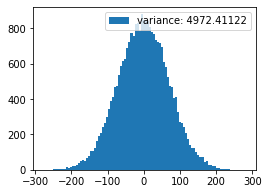

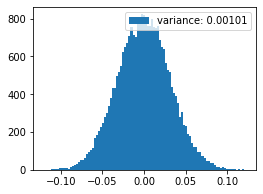

In [152]:
def plot_dist(dat):
    fig, ax = plt.subplots(figsize=(4,3))
    label = "variance: {:.5f}".format(np.var(dat))
    ax.hist( dat, bins=100, label=label)
    plt.legend()
    plt.show()

plot_dist(data_in.gfp_gaussian_noise - data_in.gfp_no_noise)
plot_dist(data_in.log_leng_noise - data_in.log_leng_no_noise)


In [79]:
data_in.to_csv(outfile)

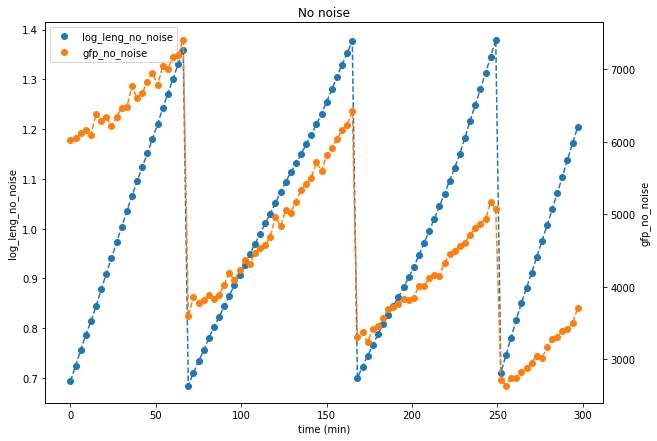

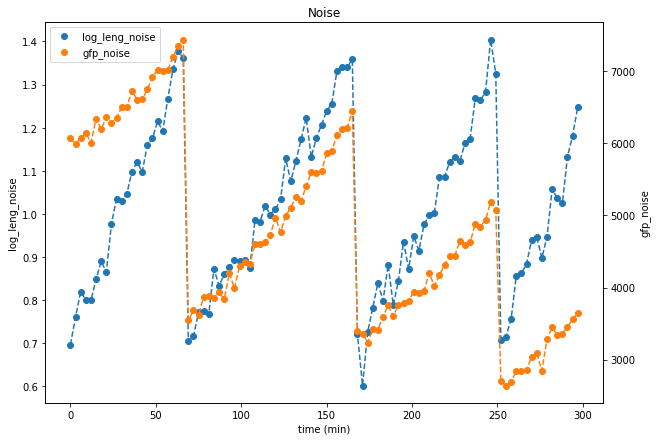

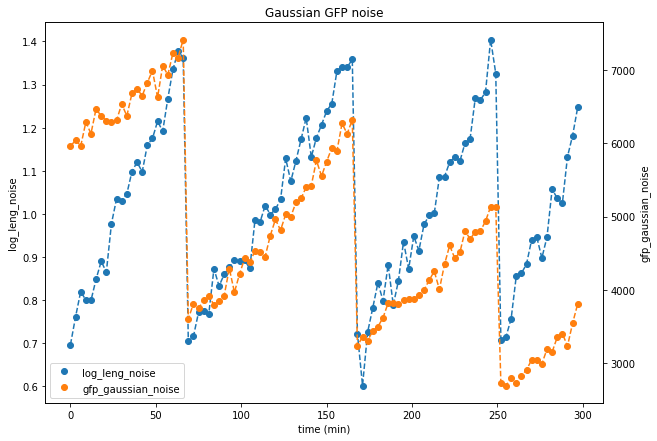

In [155]:
def plot_time_series(data, cols, title=None, n=200):
    cmap = plt.cm.tab10

    fig, ax = plt.subplots(figsize=(10,7))
    ax2 = ax.twinx()
    if title !=None:
        plt.title(title)

    time = data['time_min'][:n]
    plots = []
    for i, col in enumerate(cols):
        d = data_in[col][:n]
        if i%2==0:
            axes = ax
        else:
           axes = ax2
        plots.append(axes.plot(time, d, 'o', c=cmap(i), label=col)[0])
        axes.plot(time, d, '--', c=cmap(i))
        axes.set_ylabel(col)

    ax.set_xlabel('time (min)')

    ax.legend(plots, [l.get_label() for l in plots])
    plt.show()
    

plot_time_series(data_in, ['log_leng_no_noise', 'gfp_no_noise'], 'No noise', n=100)
plot_time_series(data_in, ['log_leng_noise', 'gfp_noise'], 'Noise', n=100)
plot_time_series(data_in, ['log_leng_noise' ,'gfp_gaussian_noise'], 'Gaussian GFP noise', n=100)